In [6]:
#2021.06.23. WED
#Hankyeong

#00. 패키지 호출
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#04. wine 데이터셋으로 군집화하기. 
#(1) 데이터셋 불러오기
wine = load_wine() 

#(2) 데이터프레임으로 변환하기. 
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [11]:
#(3) target 변수의 분포 확인하기. 
pd.Series(wine.target).value_counts().sort_index()

0    59
1    71
2    48
dtype: int64

In [7]:
#(4) 스케일링 처리하기. 
scaler = StandardScaler()
wine_scaling = scaler.fit_transform(wine.data)

#(5) kmeans 모델 할당하기. 
kmeans = KMeans(n_clusters=3)

#(6) 모델 학습하기. 
kmeans.fit(wine_scaling)

KMeans(n_clusters=3)

In [12]:
#(7) cluster_num 변수 추가하기. 
df_wine['cluster_num'] = kmeans.labels_
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster_num
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,1


In [13]:
#(8) silhouette_coef 변수 추가하기.
score_samples = silhouette_samples(wine_scaling, df_wine['cluster_num'])
df_wine['silhouette_coef'] = score_samples
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,cluster_num,silhouette_coef
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0,0.448395
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0,0.250138
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0,0.376445
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0,0.461332
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0,0.219424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,1,0.458598
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,1,0.481855
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,1,0.437407
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,1,0.423881


In [14]:
#(9) silhouette_score 구하기. 
silhouette_score(wine_scaling, df_wine['cluster_num'])

0.2848589191898987

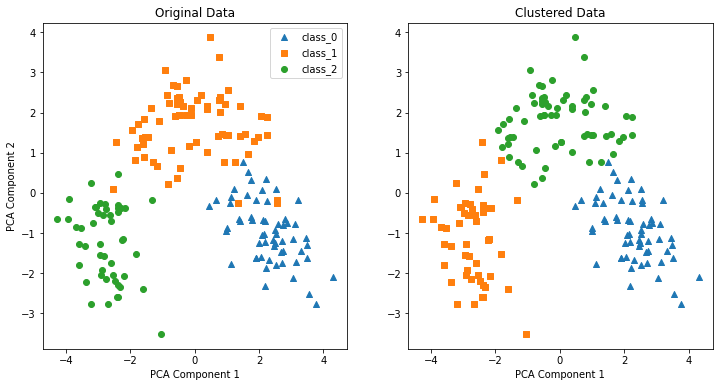

In [15]:
#05. #02. 군집 시각화하기. 
#(1) 주성분 분석을 통해 2차원으로 축소하기. 
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_scaling)
df_wine_pca = pd.DataFrame(wine_pca, columns=['PC1','PC2'])
df_wine_pca['target'] = wine.target
df_wine_pca['cluster_num'] = kmeans.labels_

#(2) 군집 시각화하고 원본과 비교하기. 
markers = ['^', 's', 'o']
fig, axs = plt.subplots(figsize= (12,6), ncols =2, nrows= 1)
for k, column in enumerate(['target','cluster_num'])    :
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df_wine_pca[df_wine_pca[column] == i ]['PC1']
        y_axis_data = df_wine_pca[df_wine_pca[column] == i ]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker = marker,label = wine.target_names[i])

    if k == 0                                           : 
        ax.legend()
        ax.set_ylabel('PCA Component 2')
        ax.set_title('Original Data')
    else                                                : 
        ax.set_title('Clustered Data')
    ax.set_xlabel('PCA Component 1')